In [1]:
%matplotlib notebook
from scipy import random as sciran
import random
from scipy import stats
import scipy
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def free_path():
    min = 0
    max = 1
    xrand = sciran.uniform(min,max)
    #value of parameter
    k = 1/sigma_t

    s = -k*np.log(xrand)
    return s

In [3]:
def collision():
    ab = sciran.uniform(0,1)
    if ab <= sigma_a/sigma_t:
      return True
    else:
      return False
    

In [4]:
def new_angle():
    ang = sciran.uniform(0,pi)
    return ang

In [5]:
def update_location(rnew,rold,anew):
    rfresh = rold + rnew*np.cos(anew)
    return rfresh

In [6]:
def boundary(rfresh):
    if rfresh > half_length:
      return 5
    elif rfresh < 0:
      return 4
    


In [7]:
def cycle(): 


  #SOURCE
  freepath = free_path()
  angle = 0


  position = 0
  global right
  global left
  global absorb


  position = update_location(freepath,position,angle)
  #print(position)
  if boundary(position) == 4:
    left = left + 1
    #print("out",left)
    return
  elif boundary(position) == 5:
    right = right + 1
    #print("right")
    return 
  if collision():
    absorb = absorb + 1
    #print("absorb",absorb)
    return 


  #TRANSITION
  while True:
    freepath = free_path()
    angle = new_angle()
    position = update_location(freepath,position,angle)
    #print("lol", j)
    #print(position)
    if boundary(position) == 4:
      left = left + 1
      #print("out2",left)
      return
    elif boundary(position) == 5:
      right = right + 1
      #print("out3",right)
      return 
    if collision():
      absorb = absorb + 1
      #print("absorb2",absorb)
      return

  
  

In [8]:
def simul(): 
  
  for i in range(N):
    cycle()
    #print("Interation:",i)

  #print("left: ",left)
  #print("right: ",right)
  #print("absorb: ", absorb)
  global Data 
  Data = np.append(Data,[[left,right,absorb]],0)
    

In [9]:


def plott(M):
  param = stats.norm.fit(M) # distribution fitting

  # now, param[0] and param[1] are the mean and 
  # the standard deviation of the fitted distribution
  #x = linspace(-5,5,100)
  domain = np.linspace(np.min(M),np.max(M))
  x = domain
  # fitted distribution
  pdf_fitted = stats.norm.pdf(domain,loc=param[0],scale=param[1])
  # original distribution
  pdf = stats.norm.pdf(x)

  plt.title('Normal distribution')
  plt.plot(x,pdf_fitted,)
  plt.hist(M,domain,ec='black',density=1,alpha=.3)
  plt.show()

0.451384


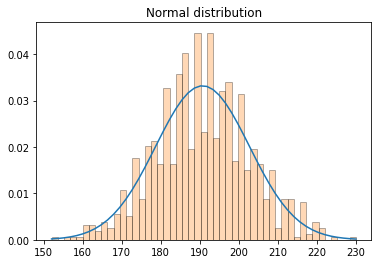

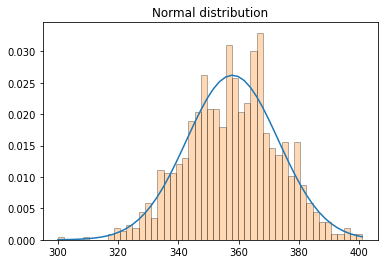

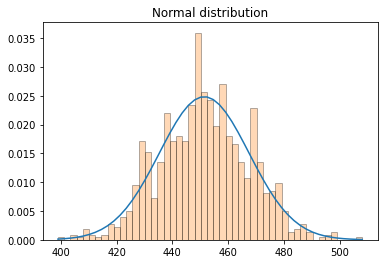

In [15]:
#global variables
sigma_t = 3 #Σt
sigma_a = 1 #Σa ratio
interation = 1000
half_length = 0.5

pi = np.pi

N = interation 

Data = [[0,0,0]]



for j in range(1000):
  right = 0
  left = 0
  absorb = 0
  simul()

Data = np.delete(Data,0,0)

Left_mean = np.mean(Data[:,0])
Right_mean = np.mean(Data[:,1])
Absorb_mean = np.mean(Data[:,2])
Left_var = np.var(Data[:,0])
Right_var = np.var(Data[:,1])
Absorb_var = np.var(Data[:,2])

Ratio_abs = Absorb_mean/1000  

print(Ratio_abs)

for w in range(3):
  plott(Data[:,w])


In [14]:
print(Data[:,2])

[463 439 460 463 462 467 450 471 461 452 451 459 468 440 446 448 452 448
 457 472 437 471 432 445 452 417 480 466 423 478 462 450 425 478 454 460
 435 457 465 487 473 470 449 487 467 416 450 473 450 466 454 444 443 467
 441 450 435 459 427 437 463 435 449 441 443 459 445 446 461 465 439 467
 481 449 438 449 445 469 465 429 426 456 458 455 444 438 446 466 451 451
 441 467 447 455 443 482 456 450 423 447 466 455 454 433 450 471 463 479
 475 449 468 452 475 418 449 440 431 445 468 430 431 451 456 460 445 432
 450 436 467 449 450 470 449 450 460 442 471 454 432 462 444 484 438 466
 445 448 445 480 449 429 461 452 453 455 455 457 457 440 478 450 470 465
 436 462 447 443 462 428 421 457 437 454 458 422 459 455 449 479 434 439
 449 455 461 435 443 451 426 457 441 441 463 437 450 455 452 455 464 470
 443 431 427 441 487 460 423 473 440 450 454 464 437 438 466 432 453 456
 449 421 459 436 446 422 449 441 453 422 449 462 461 450 476 443 438 449
 458 449 459 458 428 433 460 422 440 442 460 453 45